In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
xlsx = pd.ExcelFile("../data/datos_tratados.xlsx")

# Cargar cada hoja
libros = xlsx.parse("libros")
espectaculos = xlsx.parse("espectaculos")
educacion = xlsx.parse("educacion")
bys = xlsx.parse("bys")
cine = xlsx.parse("cine")
renta = xlsx.parse("renta")

#diferentes
ingresos = xlsx.parse("ingresos")
caracteristicas = xlsx.parse("caracteristicas")

### Empezamos con la **Hipótesis 1: Educación y consumo cultural**

🎯 *Objetivo*

Analizar si existe relación entre el nivel educativo medio de las comunidades autónomas y su gasto en cultura.

💡 *Hipótesis formal*

H₀ (nula): No hay relación entre el nivel educativo y el gasto en cultura.

H₁ (alternativa): A mayor nivel educativo, mayor gasto en cultura.

In [3]:
# Filtrar por indicador
indicador = "GASTO MEDIO POR PERSONA (Euros)"

libros_f = libros[libros["Indicador_libros"] == indicador]
solo_libros = libros_f[libros_f["Grupo de gasto_libros"] == "Libro"]
solo_periodicos = libros_f[libros_f["Grupo de gasto_libros"] == "Publicaciones periódicas"]
libros_por_comunidad = solo_libros.groupby(["Comunidad autónoma"])["Total_libros"].mean() 
periodicos_por_comunidad = solo_periodicos.groupby(["Comunidad autónoma"])["Total_libros"].mean().rename("Total_periodicos")

espect_f = espectaculos[espectaculos["Indicador_espectaculos"] == indicador]
espect_por_comunidad = espect_f.groupby(["Comunidad autónoma"])["Total_espectaculos"].mean() 

bys_f = bys[(bys["Indicador_bys"] == indicador) & (bys["Grupo de gasto_bys"] == "Servicios culturales")]
bys_por_comunidad = bys_f.groupby(["Comunidad autónoma"])["Total_bys"].mean() 

In [4]:
libros_por_comunidad = pd.DataFrame(libros_por_comunidad)
libros_por_comunidad = libros_por_comunidad.reset_index() #comunidad autónoma como columna para poder hacer el merge
periodicos_por_comunidad = pd.DataFrame(periodicos_por_comunidad)
periodicos_por_comunidad = periodicos_por_comunidad.reset_index()
espect_por_comunidad = pd.DataFrame(espect_por_comunidad)
espect_por_comunidad = espect_por_comunidad.reset_index()
bys_por_comunidad = pd.DataFrame(bys_por_comunidad)
bys_por_comunidad = bys_por_comunidad.reset_index()

In [5]:
# Unir datasets por 'Comunidad autónoma'
df_merged = libros_por_comunidad.merge(periodicos_por_comunidad, on="Comunidad autónoma")
df_merged = df_merged.merge(espect_por_comunidad, on="Comunidad autónoma")
df_merged = df_merged.merge(bys_por_comunidad, on="Comunidad autónoma")

In [6]:
df_merged

,Comunidad autónoma,Total_libros,Total_periodicos,Total_espectaculos,Total_bys
0,Andalucía,20.900000,4.533333,21.300000,35.000000
1,Aragón,44.566667,13.233333,30.666667,46.933333
2,Asturias (Principado de),42.933333,17.233333,14.366667,33.566667
3,Balears (Illes),41.100000,8.300000,41.833333,50.800000
4,Canarias,23.566667,3.933333,13.700000,26.433333
5,Cantabria,24.200000,18.166667,20.166667,26.033333
6,Castilla y León,51.633333,15.600000,32.033333,42.800000
7,Castilla-La Mancha,29.566667,4.066667,15.700000,25.466667
8,Cataluña,42.533333,7.633333,19.300000,36.066667
9,Comunitat Valenciana,29.700000,5.500000,20.166667,42.700000


In [7]:
edu_sup = educacion[
    (educacion["Nivel de formación alcanzado"] == "Educación superior") |
    (educacion["Nivel de formación alcanzado"] == "Segunda etapa de educación secundaria con orientación profesional (incluye educación postsecundaria no superior)") |
    (educacion["Nivel de formación alcanzado"] == "Segunda etapa de educación secundaria, con orientación general")]
edu_sup= edu_sup.groupby("Comunidad autónoma")["Total_educacion"].mean()
edu_sup = pd.DataFrame(edu_sup)
edu_sup = edu_sup.reset_index()

# Merge por 'Comunidad autónoma'
df_gasto_educacion = df_merged.merge(edu_sup, on="Comunidad autónoma", how="inner")

In [8]:
df_gasto_educacion= df_gasto_educacion.sort_values(by="Total_educacion", ascending=False)
df_gasto_educacion

,Comunidad autónoma,Total_libros,Total_periodicos,Total_espectaculos,Total_bys,Total_educacion
14,País Vasco,35.333333,31.366667,27.100000,45.400000,22.065741
11,Madrid (Comunidad de),46.866667,7.866667,36.466667,60.366667,21.918056
13,Navarra (Comunidad Foral de),30.733333,30.066667,39.800000,60.366667,20.572685
5,Cantabria,24.200000,18.166667,20.166667,26.033333,19.962500
2,Asturias (Principado de),42.933333,17.233333,14.366667,33.566667,18.843056
1,Aragón,44.566667,13.233333,30.666667,46.933333,18.841667
7,Cataluña,42.533333,7.633333,19.300000,36.066667,18.799537
4,Canarias,23.566667,3.933333,13.700000,26.433333,18.680556
3,Balears (Illes),41.100000,8.300000,41.833333,50.800000,18.451852
15,Rioja (La),46.833333,11.700000,33.433333,50.866667,18.406019


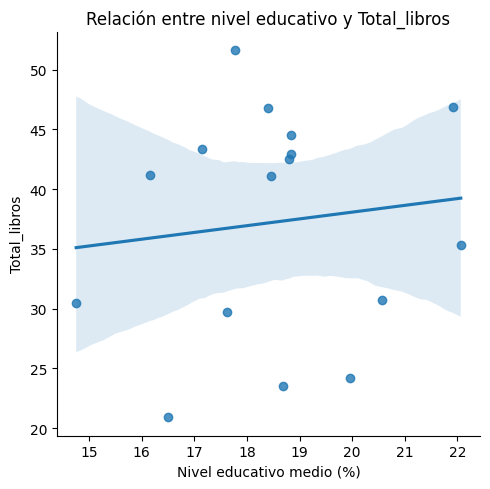

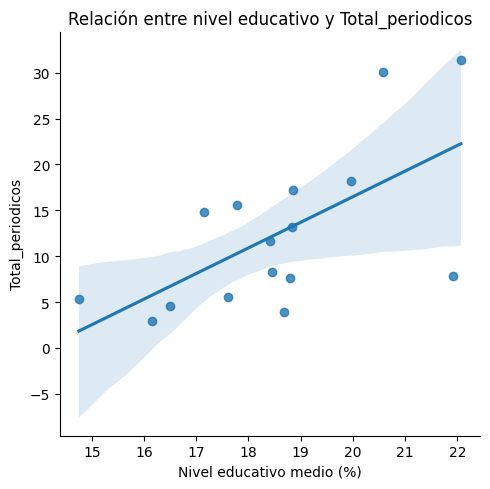

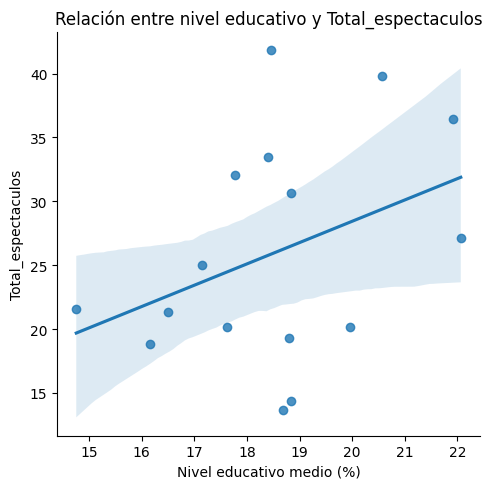

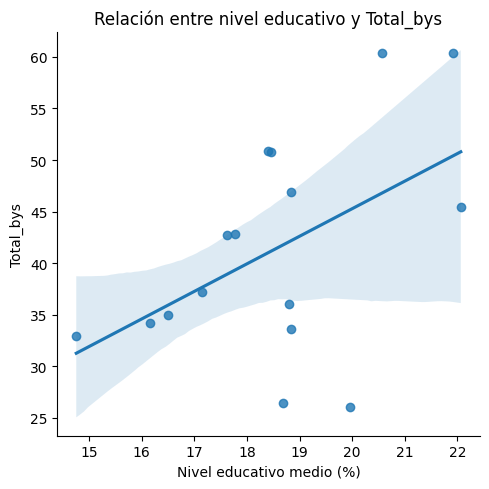

In [9]:
gasto_columnas = ['Total_libros', 'Total_periodicos', 'Total_espectaculos', 'Total_bys']

# Bucle para crear una gráfica por cada tipo de gasto
for col in gasto_columnas:
    sns.lmplot(data=df_gasto_educacion, x='Total_educacion', y=col)
    plt.title(f"Relación entre nivel educativo y {col}")
    plt.xlabel("Nivel educativo medio (%)")
    plt.ylabel(f'{col}')
    plt.tight_layout()
    plt.show()

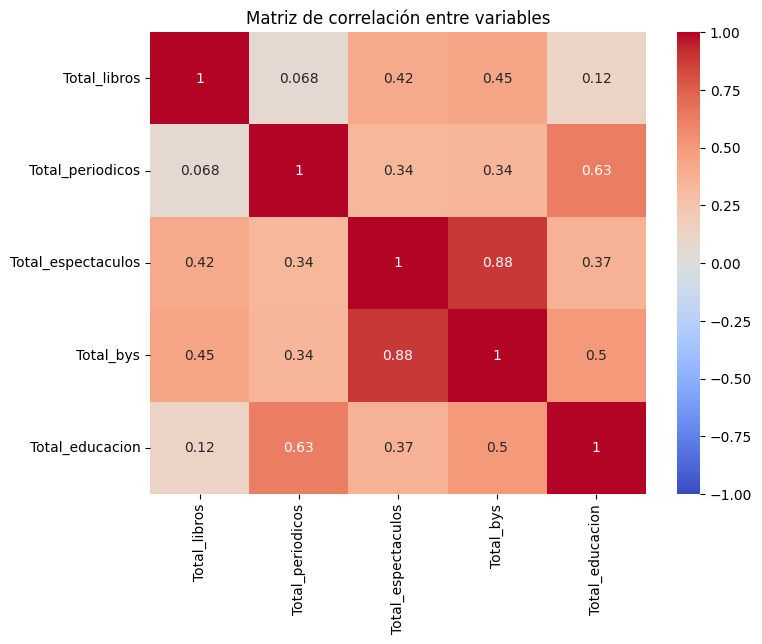

In [10]:
# Correlación entre todas las variables numéricas
corr = df_gasto_educacion.drop(columns="Comunidad autónoma").corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de correlación entre variables")
plt.show()

La correlación positiva más fuerte es entre Total_espectaculos y Total_bys (0.88), lo que indica una tendencia muy fuerte: las regiones con más gasto medio por persona en espectáculos también tienden a tener un mayor gasto medio por persona en servicios culturales.

También se observan correlaciones positivas fuertes entre:

Total_educacion (porcentaje de personas con educación superior) y Total_bys (gasto medio por persona en servicios culturales): 0.45

Total_periodicos (gasto medio por persona en publicaciones periódicas) y Total_educacion (porcentaje de personas con educación superior): 0.63


In [11]:
#COEFICIENTE PEARSON
from scipy.stats import pearsonr

for col in gasto_columnas:
    corr, p = pearsonr(df_gasto_educacion['Total_educacion'], df_gasto_educacion[col])
    print(f"{col}: Correlación = {corr:.2f}, p-valor = {p:.4f}")


Total_libros: Correlación = 0.12, p-valor = 0.6651
Total_periodicos: Correlación = 0.63, p-valor = 0.0086
Total_espectaculos: Correlación = 0.37, p-valor = 0.1552
Total_bys: Correlación = 0.50, p-valor = 0.0509


| **Variable**                                            | **Correlación (r)** | **p-valor** | **Interpretación**                                                                                  |
| ------------------------------------------------------- | ------------------- | ----------- | --------------------------------------------------------------------------------------------------- |
| Gasto medio por persona en **libros**                   | 0.12                | 0.6651      | Correlación débil y **no significativa**. No se puede afirmar una relación con el nivel educativo.  |
| Gasto medio por persona en **publicaciones periódicas** | **0.63**            | **0.0086**  | **Correlación moderada y significativa**. A mayor educación, más gasto en publicaciones periódicas. |
| Gasto medio por persona en **espectáculos**             | 0.37                | 0.1552      | Correlación débil y **no significativa**. No hay evidencia estadística de relación.                 |
| Gasto medio por persona en **servicios culturales**     | 0.50                | 0.0509      | Correlación moderada con significancia marginal (p ≈ 0.05) |


#### ✅ Conclusión general:

La hipótesis H1 ("la educación influye en el consumo cultural") se confirma parcialmente:

Hay evidencia estadística de que mayor educación está asociada con más  gasto en periódicos.

Para otras categorías (libros, espectáculos, servicios culturales), la tendencia es positiva pero no alcanza significancia estadística al nivel 0.05.

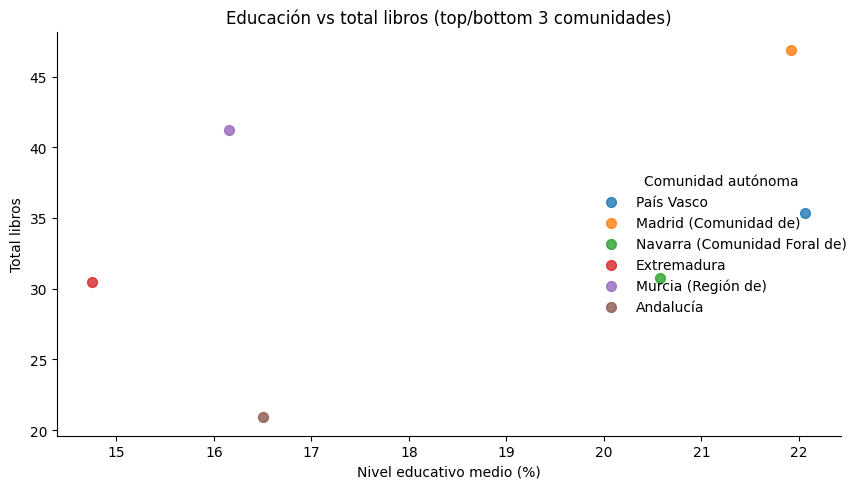

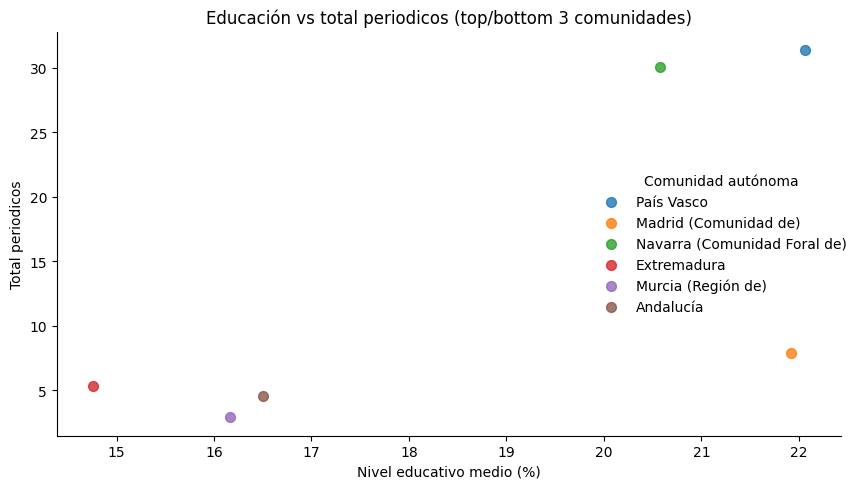

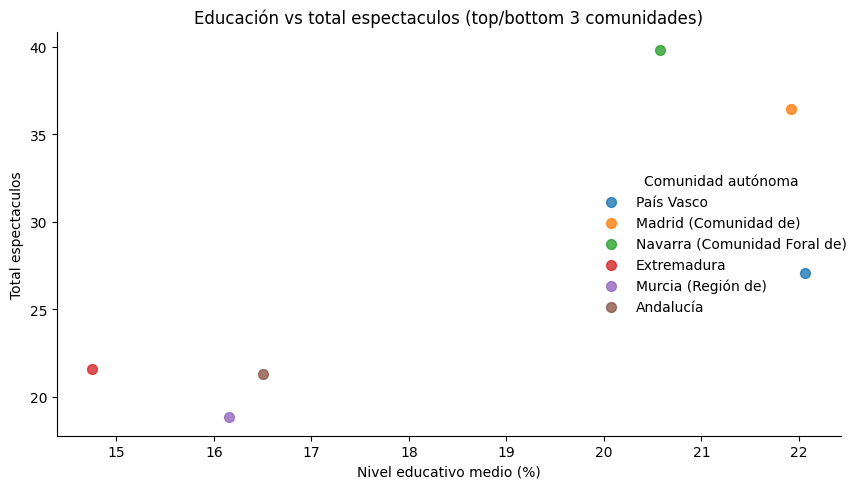

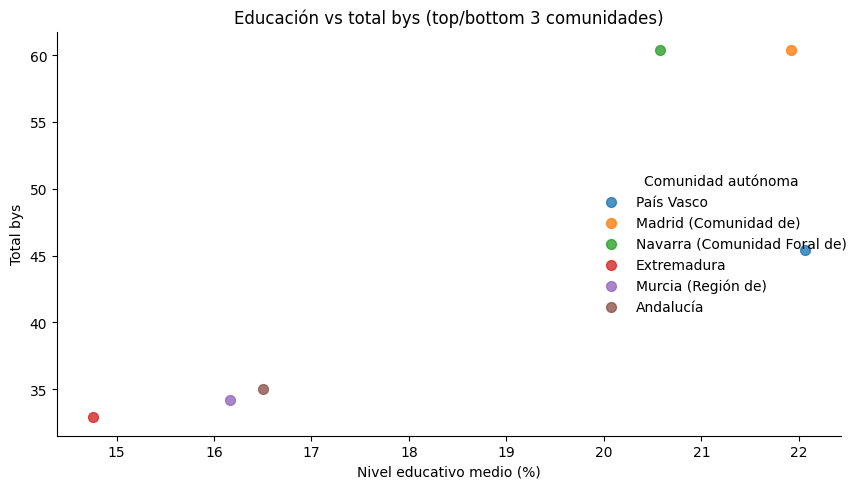

In [12]:
# Selección de comunidades
top_bottom = pd.concat([
    df_gasto_educacion.nlargest(3, 'Total_educacion'),
    df_gasto_educacion.nsmallest(3, 'Total_educacion')
])

for col in gasto_columnas:
    sns.lmplot(
        data=top_bottom,
        x='Total_educacion',
        y=col,
        hue='Comunidad autónoma',
        height=5,
        aspect=1.2,
        markers='o',
        scatter_kws={'s': 50, 'alpha': 0.8})
    
    plt.title(f"Educación vs {col.replace('_', ' ').lower()} (top/bottom 3 comunidades)")
    plt.xlabel("Nivel educativo medio (%)")
    plt.ylabel(f"{col.replace('_', ' ')}")
    plt.tight_layout()
    plt.show()

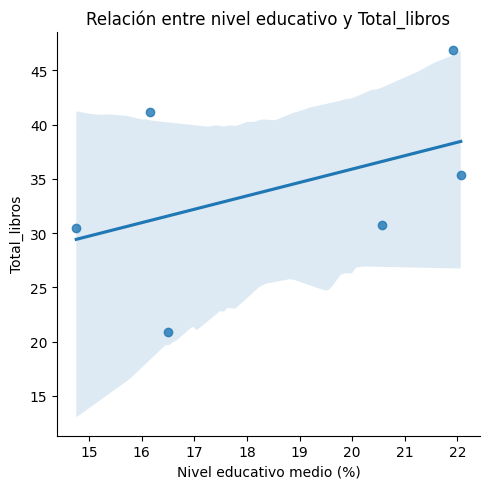

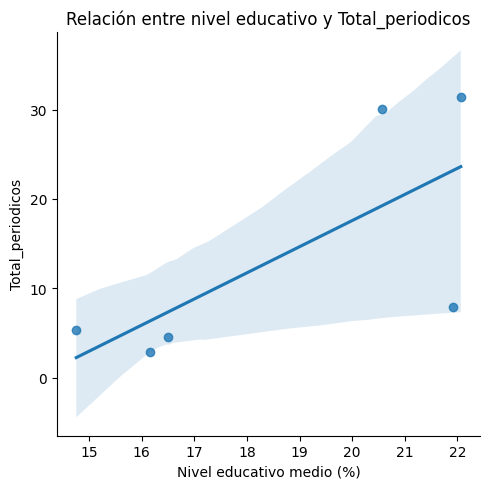

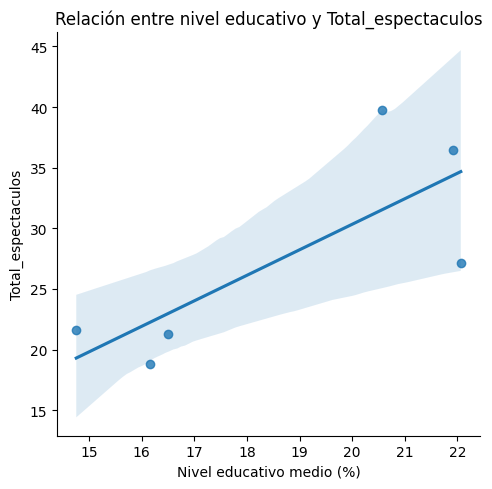

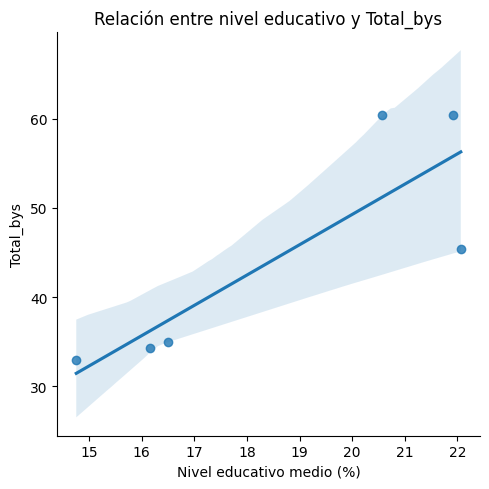

In [13]:
for col in gasto_columnas:
    sns.lmplot(data=top_bottom, x='Total_educacion', y=col)
    plt.title(f"Relación entre nivel educativo y {col}")
    plt.xlabel("Nivel educativo medio (%)")
    plt.ylabel(f'{col}')
    plt.tight_layout()
    plt.show()

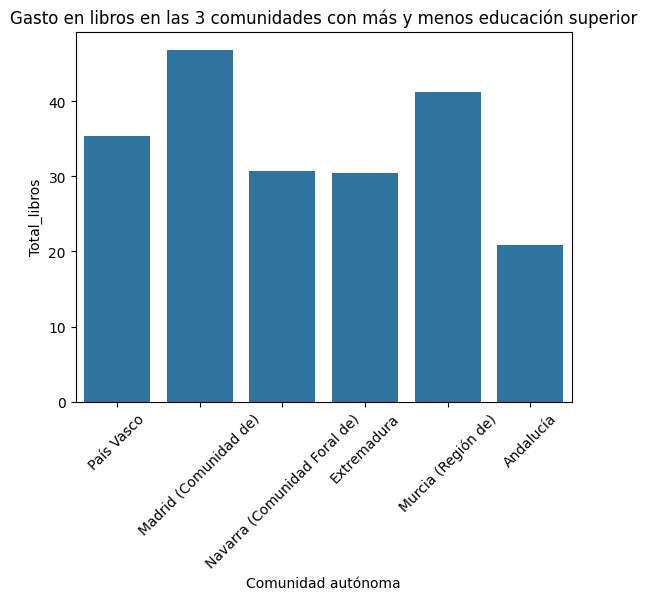

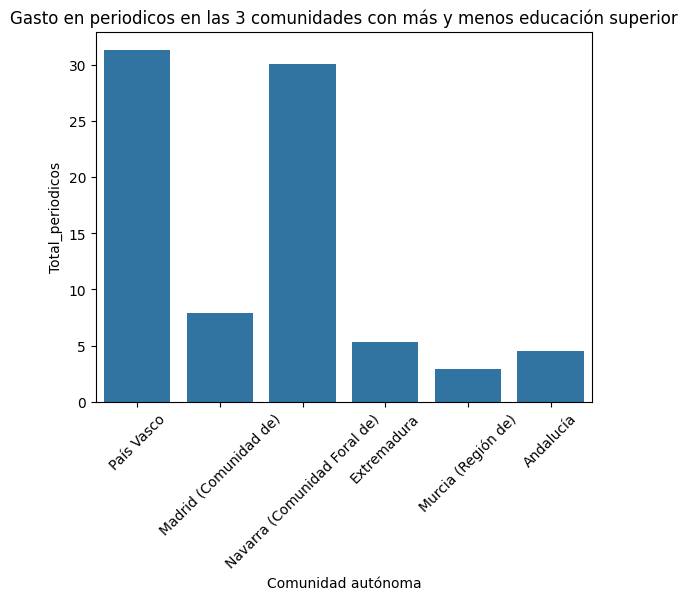

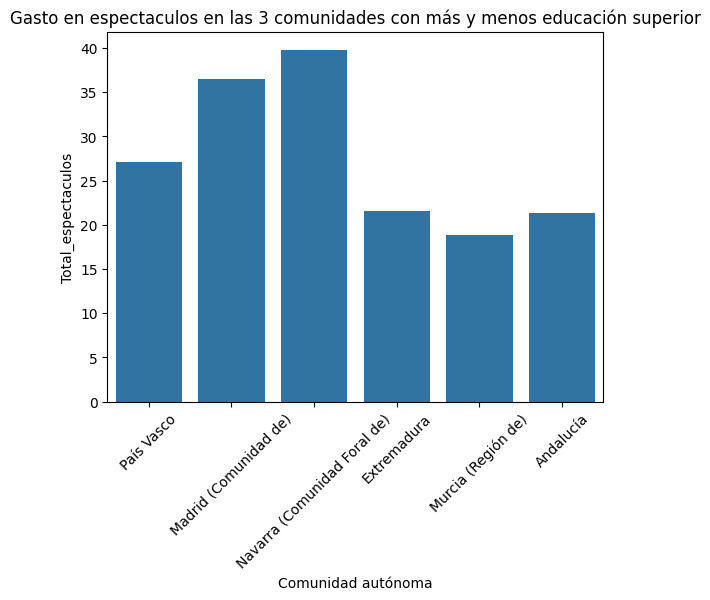

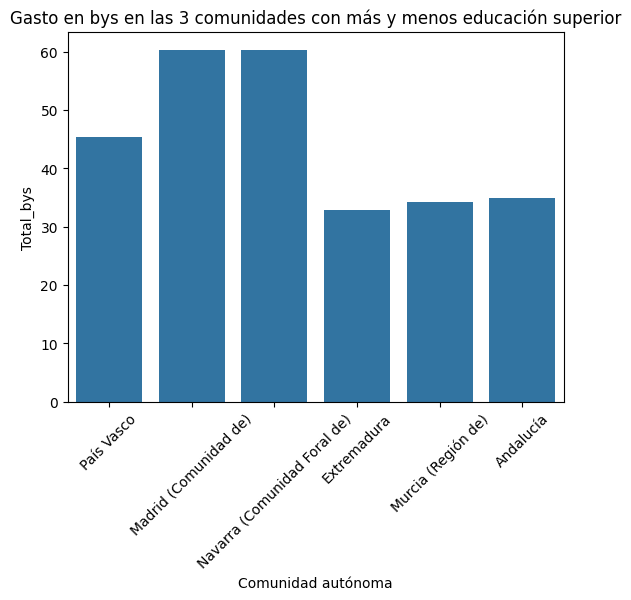

In [14]:
for col in gasto_columnas:
    sns.barplot(data=top_bottom, x='Comunidad autónoma', y=col)
    plt.xticks(rotation=45)
    plt.title(f"Gasto en {col.replace("Total_", "")} en las 3 comunidades con más y menos educación superior")
    plt.show()

### Seguimos con la **Hipótesis 2: Edad media y consumo cultural**

🎯 *Objetivo*

Analizar si existe relación entre la edad  y el consumo cultural. 

💡*Hipótesis formal*

H₀ (nula): No existe relación significativa entre la edad y el consumo cultural.

H₁ (alternativa): Existe una relación significativa entre la edad y el consumo cultural.


In [ ]:
df_filtrado= caracteristicas[caracteristicas["Indicador_caracteristicas"] == indicador].copy()

df_filtrado['Caracteristicas'] = df_filtrado['Características del sustentador principal'].str.strip()

df_filtrado['Edad'] = df_filtrado['Caracteristicas'].where(df_filtrado['Caracteristicas'].str.startswith('Grupo de edad'))

In [ ]:
df_filtrado = df_filtrado[["periodo", "Edad", "Total_caracteristicas"]].dropna()
df_filtrado

,periodo,Edad,Total_caracteristicas
41,2023,Grupo de edad: de 65 años en adelante,180.2
42,2023,Grupo de edad: de 45 a 64 años,230.1
43,2023,Grupo de edad: de 30 a 44 años,281.8
44,2023,Grupo de edad: de 16 a 29 años,356.4
141,2022,Grupo de edad: de 65 años en adelante,181.1
142,2022,Grupo de edad: de 45 a 64 años,243.3
143,2022,Grupo de edad: de 30 a 44 años,281.5
144,2022,Grupo de edad: de 16 a 29 años,322.9
241,2021,Grupo de edad: de 65 años en adelante,174.6
242,2021,Grupo de edad: de 45 a 64 años,239.1


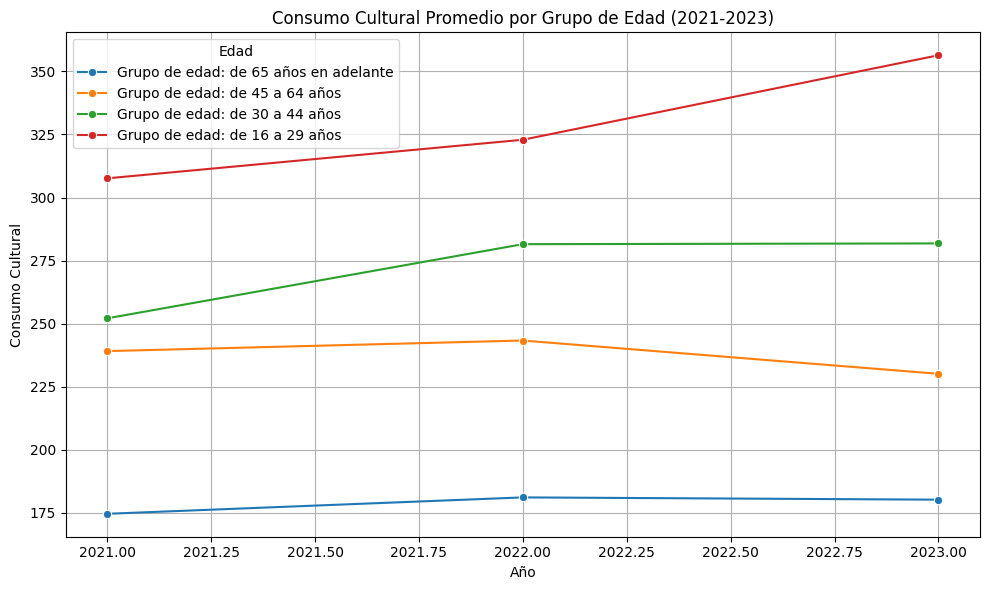

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtrado, x='periodo', y='Total_caracteristicas', hue='Edad', marker='o')
plt.title('Consumo Cultural Promedio por Grupo de Edad (2021-2023)')
plt.ylabel('Consumo Cultural')
plt.xlabel('Año')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import f_oneway

# Agrupar por edad
grupos = [df_filtrado[df_filtrado['Edad'] == edad]['Total_caracteristicas'] for edad in df_filtrado['Edad'].unique()]

# ANOVA
f_stat, p_valor = f_oneway(*grupos)
print(f"F-statistic: {f_stat:.3f}, p-valor: {p_valor:}")

F-statistic: 48.929, p-valor: 1.7192621442180648e-05


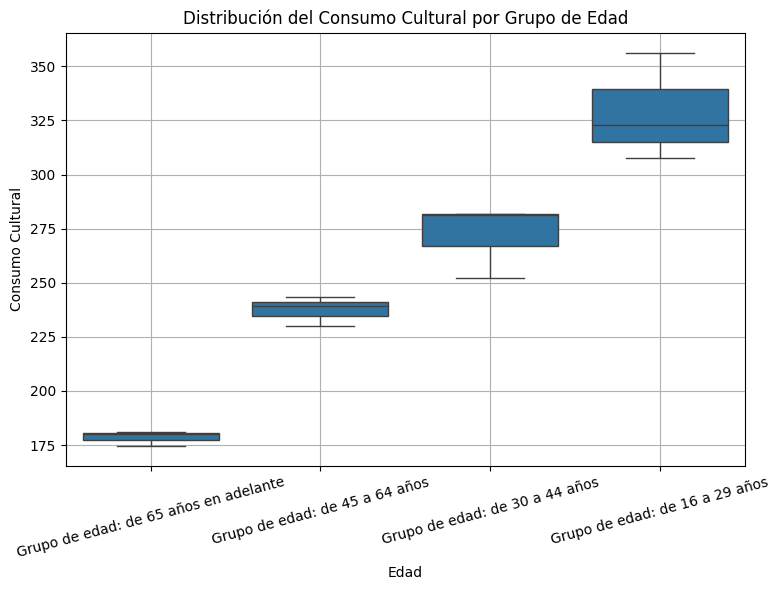

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtrado, x='Edad', y='Total_caracteristicas')
plt.title('Distribución del Consumo Cultural por Grupo de Edad')
plt.ylabel('Consumo Cultural')
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_mean = df_filtrado.groupby('Edad', as_index=False)['Total_caracteristicas'].mean()
df_mean

,Edad,Total_caracteristicas
0,Grupo de edad: de 16 a 29 años,328.966667
1,Grupo de edad: de 30 a 44 años,271.800000
2,Grupo de edad: de 45 a 64 años,237.500000
3,Grupo de edad: de 65 años en adelante,178.633333


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Edad media asignada
lista= [22.5, 37, 54.5, 70]

# Crear DataFrame promedio si no lo tienes ya
df_promedio = df_filtrado.groupby('Edad', as_index=False)['Total_caracteristicas'].mean()
df_promedio['Edad_media'] = lista

# Calcular correlación
corr, p_valor = pearsonr(df_promedio['Edad_media'], df_promedio['Total_caracteristicas'])

print(f"Coeficiente de correlación de Pearson: {corr:.4f}")
print(f"p-valor: {p_valor:.4f}")

Coeficiente de correlación de Pearson: -0.9917
p-valor: 0.0083


Se obtuvo un p-valor < 0.05, lo que indica que la relación es estadísticamente significativa.

El coeficiente de correlación es negativo (r < 0), lo que implica que a mayor edad, menor es el consumo cultural.

**Interpretación:**
Existe una relación significativa y negativa entre la edad y el consumo cultural. Los grupos más jóvenes (16 a 29 años) presentan un consumo notablemente mayor, mientras que este decrece progresivamente en los grupos de mayor edad.

### Seguimos con la **Hipótesis 3: A mayores ingresos, mayor gasto cultural**
🎯 *Objetivo*
Contestar: ¿Hay una relación directa entre el nivel de ingresos y el gasto en productos culturales?

💡 *Hipótesis formal*
H₀ (nula): No existe una relación significativa entre el nivel de ingresos y el gasto en productos culturales.

H₁ (alternativa): Existe una relación significativa y positiva entre el nivel de ingresos y el gasto en productos culturales.

In [ ]:
ingresos_filtrado1 = ingresos[ingresos["Indicador_ingresos"] == "GASTO MEDIO POR PERSONA (Euros)"]
ingresos_mensuales= ingresos_filtrado1.groupby('Ingresos mensuales en el hogar')['Total_ingresos'].mean().sort_values(ascending=False).reset_index()
ingresos_mensuales

,Ingresos mensuales en el hogar,Total_ingresos
0,3.000 y más euros,305.100000
1,Total,235.666667
2,Entre 2.500 y 2.999 euros,230.166667
3,Entre 2.000 y 2.499 euros,223.666667
4,Entre 1.500 y 1.999 euros,211.200000
5,Entre 1.000 y 1.499 euros,173.366667
6,Menos de 1.000 euros,148.733333


In [ ]:
ingresos_mensuales.drop(1, inplace=True) #Borramos la fila con el total

In [ ]:
renta["Renta mensual"] = renta["Total_renta"]/12

In [ ]:
renta_total= renta.groupby(["Comunidad autónoma"])["Renta mensual"].mean()
renta_total=pd.DataFrame(renta_total)
renta_total= renta_total.reset_index() #tener Comunidad autónoma como columna
renta_total

,Comunidad autónoma,Renta mensual
0,Andalucía,898.250000
1,Aragón,1171.388889
2,"Asturias, Principado de",1168.611111
3,"Balears, Illes",1050.694444
4,Canarias,918.166667
5,Cantabria,1133.916667
6,Castilla - La Mancha,922.416667
7,Castilla y León,1113.972222
8,Cataluña,1241.138889
9,Comunitat Valenciana,997.722222


In [ ]:
def obtener_categoria_ingresos(renta_mensual):
    if renta_mensual >= 3000:
        return '3.000 y más euros'
    elif renta_mensual >= 2500:
        return 'Entre 2.500 y 2.999 euros'
    elif renta_mensual >= 2000:
        return 'Entre 2.000 y 2.499 euros'
    elif renta_mensual >= 1500:
        return 'Entre 1.500 y 1.999 euros'
    elif renta_mensual >= 1000:
        return 'Entre 1.000 y 1.499 euros'
    else:
        return 'Menos de 1.000 euros'

In [ ]:
renta_total['Categoria'] = renta_total['Renta mensual'].apply(obtener_categoria_ingresos)
renta_total

,Comunidad autónoma,Renta mensual,Categoria
0,Andalucía,898.250000,Menos de 1.000 euros
1,Aragón,1171.388889,Entre 1.000 y 1.499 euros
2,"Asturias, Principado de",1168.611111,Entre 1.000 y 1.499 euros
3,"Balears, Illes",1050.694444,Entre 1.000 y 1.499 euros
4,Canarias,918.166667,Menos de 1.000 euros
5,Cantabria,1133.916667,Entre 1.000 y 1.499 euros
6,Castilla - La Mancha,922.416667,Menos de 1.000 euros
7,Castilla y León,1113.972222,Entre 1.000 y 1.499 euros
8,Cataluña,1241.138889,Entre 1.000 y 1.499 euros
9,Comunitat Valenciana,997.722222,Menos de 1.000 euros


In [ ]:
# Unir con el dataframe de ingresos
resultado = renta_total.merge(ingresos_mensuales, left_on='Categoria', right_on='Ingresos mensuales en el hogar')
resultado = resultado[['Comunidad autónoma', 'Renta mensual', 'Categoria', 'Total_ingresos']]

resultado.sort_values(by="Renta mensual")

,Comunidad autónoma,Renta mensual,Categoria,Total_ingresos
10,Extremadura,861.000000,Menos de 1.000 euros,148.733333
13,"Murcia, Región de",885.472222,Menos de 1.000 euros,148.733333
0,Andalucía,898.250000,Menos de 1.000 euros,148.733333
4,Canarias,918.166667,Menos de 1.000 euros,148.733333
6,Castilla - La Mancha,922.416667,Menos de 1.000 euros,148.733333
9,Comunitat Valenciana,997.722222,Menos de 1.000 euros,148.733333
11,Galicia,1026.444444,Entre 1.000 y 1.499 euros,173.366667
3,"Balears, Illes",1050.694444,Entre 1.000 y 1.499 euros,173.366667
7,Castilla y León,1113.972222,Entre 1.000 y 1.499 euros,173.366667
16,"Rioja, La",1128.750000,Entre 1.000 y 1.499 euros,173.366667


In [ ]:
corr, p_valor = pearsonr(resultado['Renta mensual'], resultado['Total_ingresos'])
print(f"Correlación: {corr:.4f}, p-valor: {p_valor:.4f}")


Correlación: 0.8136, p-valor: 0.0001


**Conclusión**

Dado que el p-valor (0.0001) es mucho menor que el nivel de significancia común (α = 0.05), se rechaza la hipótesis nula.

Por lo tanto, hay evidencia estadísticamente significativa para afirmar que existe una relación directa y positiva entre los ingresos medios por persona y el gasto en productos culturales.

Este resultado respalda la hipótesis de investigación: a mayores ingresos, mayor gasto cultural.

| Hipótesis               | ¿Confirmada?   | Variables significativas | Relación |
| ----------------------- | -------------- | ------------------------ | -------- |
| H1: Educación → Cultura | ✅ Parcialmente | Periódicos         | Positiva |
| H2: Edad → Cultura      | ✅ Sí           | Edad media vs gasto      | Negativa |
| H3: Renta → Cultura     | ✅ Sí           | Renta vs gasto   | Positiva |


In [ ]:
df = df_gasto_educacion.merge(resultado, on="Comunidad autónoma")
df = df.copy()
df.drop(columns=["Comunidad autónoma", "Categoria"],inplace=True)

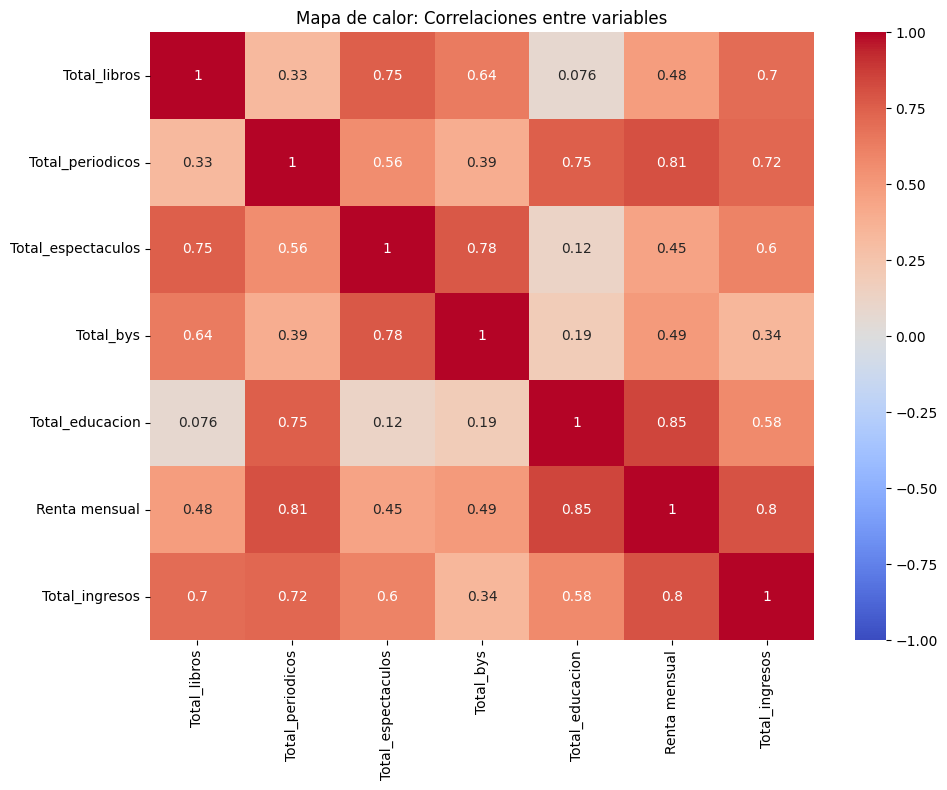

In [ ]:
correlaciones = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor: Correlaciones entre variables')
plt.tight_layout()
plt.show()

Renta mensual se relaciona positivamente con casi todas las variables culturales, lo que sugiere que la capacidad económica es un fuerte impulsor del consumo cultural.

Los valores más altos los encontramos con periódicos a nivel de categorías. Y en el total destinado a 

Text(0.5, 1.0, 'Renta mensual vs Gasto en publicaciones periódicas')

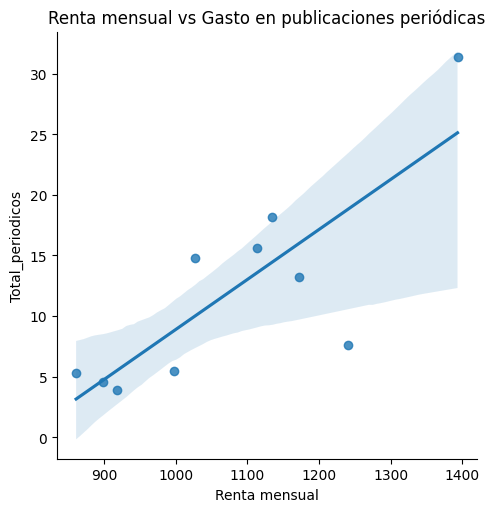

In [ ]:
sns.lmplot(data=df, x='Renta mensual', y='Total_periodicos')
plt.title('Renta mensual vs Gasto en publicaciones periódicas')